In [1]:
import gc
import json
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.cluster import KMeans
from chinese_calendar import is_holiday
from tqdm import tqdm_notebook
from utils import FlattenDataSimple, loadJSON, loadpkl

%matplotlib inline

/home/fujiwara/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [35]:
# load csv
profiles = pd.read_csv('../input/data_set_phase2/profiles.csv')
test_plans = pd.read_csv('../input/data_set_phase2/test_plans.csv')
test_queries = pd.read_csv('../input/data_set_phase2/test_queries.csv')
train_clicks = pd.read_csv('../input/data_set_phase2/train_clicks_phase2.csv')
train_plans1 = pd.read_csv('../input/data_set_phase1/train_plans.csv')
train_plans = pd.read_csv('../input/data_set_phase2/train_plans_phase2.csv')
train_queries = pd.read_csv('../input/data_set_phase2/train_queries_phase2.csv')
train_queries1 = pd.read_csv('../input/data_set_phase1/train_queries.csv')

In [41]:
profiles1 = pd.read_csv('../input/data_set_phase1/profiles.csv')

In [3]:
# merge click
train_plans = pd.merge(train_plans, train_clicks[['sid','click_mode']], on='sid', how='left')

# fill na (no click)
train_plans['click_mode'].fillna(0, inplace=True)

# set test target as nan
test_plans['click_mode'] = np.nan

# merge train & test
plans = train_plans.append(test_plans)

del train_plans, test_plans
gc.collect()

# reset index
plans.reset_index(inplace=True,drop=True)

# convert json
for key in tqdm_notebook(['distance', 'price', 'eta', 'transport_mode']):
    plans[key] = plans.plans.apply(lambda x: loadJSON(x,key))

# flatten
plans_df = [FlattenDataSimple(plans, key) for key in tqdm_notebook(['distance', 'price', 'eta', 'transport_mode'])]
plans_df = pd.concat(plans_df,axis=1)

# merge plan_time & click_mode
plans_df = pd.merge(plans_df.reset_index(), plans[['sid','plan_time', 'click_mode']], on='sid',how='outer')

# cleaning
for c in plans_df.columns.to_list():
    if 'price' in c:
        plans_df[c] = plans_df[c].replace('',0)

plans_df['plan_time'] = pd.to_datetime(plans_df['plan_time'])

In [36]:
train_queries = train_queries1.append(train_queries)

train_queries['is_test']=False
test_queries['is_test']=True

queries = train_queries.append(test_queries)

del train_queries, test_queries
gc.collect()

208

In [37]:
# to datetime
queries['req_time'] = pd.to_datetime(queries['req_time'])

# distance features
queries['x_o']=queries['o'].apply(lambda x: x.split(',')[0]).astype(float)
queries['y_o']=queries['o'].apply(lambda x: x.split(',')[1]).astype(float)
queries['x_d']=queries['d'].apply(lambda x: x.split(',')[0]).astype(float)
queries['y_d']=queries['d'].apply(lambda x: x.split(',')[1]).astype(float)

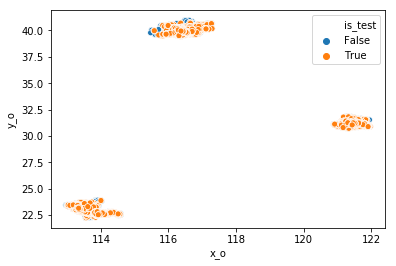

In [38]:
sns.scatterplot(x='x_o',y='y_o',data=queries,hue='is_test')

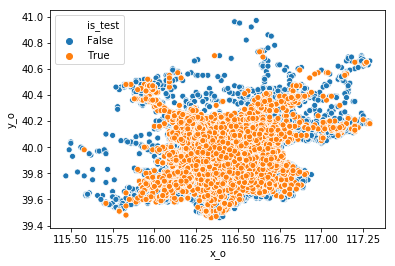

In [39]:
sns.scatterplot(x='x_o',y='y_o',data=queries[queries.y_o>37.5],hue='is_test')

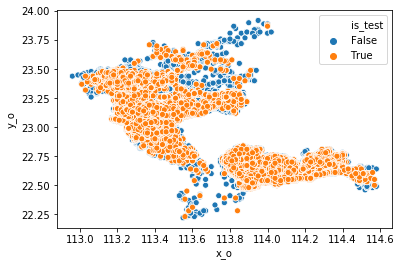

In [40]:
sns.scatterplot(x='x_o',y='y_o',data=queries[queries.y_o<27.5],hue='is_test')

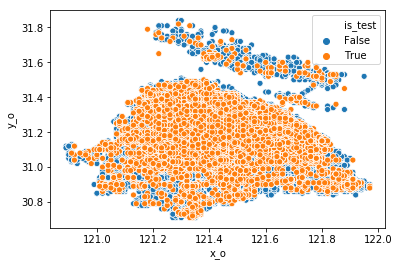

In [33]:
sns.scatterplot(x='x_o',y='y_o',data=queries[queries.x_o>120],hue='is_test')

In [45]:
tmp_prof = profiles1.append(profiles)

In [44]:
tmp_prof.drop_duplicates()

,pid,p0,p1,p2,p3,p4,p5,p6,p7,p8,...,p56,p57,p58,p59,p60,p61,p62,p63,p64,p65
0,196356,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,204083,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,170667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,115511,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,129719,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,174347,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,143618,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,116999,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,194535,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,125275,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [64]:
tmp_p = []
for p in pids:
    if p not in profiles.pid:
        print(p)
        tmp_p.append(p)

154248.0
176016.0
147809.0
120956.0
152981.0
184116.0
155506.0
200683.0
152574.0
146763.0
179717.0
216601.0
124914.0
135465.0
196416.0
123636.0
142161.0
134145.0
138437.0
158173.0
131707.0
215451.0
142107.0
165709.0
148618.0
133222.0
157784.0
171977.0
163769.0
142295.0
140360.0
140932.0
161174.0
124538.0
167216.0
120857.0
135290.0
141054.0
163464.0
190074.0
125814.0
150052.0
124205.0
162278.0
120076.0
120877.0
147849.0
216103.0
186508.0
141267.0
185651.0
197910.0
208297.0
123275.0
138589.0
129516.0
121433.0
140442.0
127959.0
148180.0
147083.0
150094.0
128687.0
130277.0
124743.0
159982.0
131135.0
128260.0
149063.0
159907.0
166104.0
197337.0
161833.0
159243.0
163898.0
199229.0
153189.0
166055.0
151566.0
177302.0
184158.0
140330.0
132576.0
131836.0
136372.0
129993.0
144646.0
133833.0
156585.0
129936.0
170632.0
157230.0
130098.0
145146.0
158229.0
133562.0
132939.0
198163.0
124527.0
140005.0
132016.0
141527.0
207654.0
214759.0
137267.0
164366.0
163543.0
122070.0
142992.0
127108.0
120260.0
1

138557.0
138539.0
131888.0
138393.0
206848.0
138261.0
138390.0
138356.0
138344.0
161072.0
138323.0
175036.0
129573.0
137078.0
129580.0
137153.0
137257.0
129556.0
130624.0
137013.0
131720.0
129626.0
136799.0
129649.0
170872.0
136763.0
136895.0
129587.0
136954.0
137270.0
137630.0
129467.0
137602.0
137297.0
189944.0
137572.0
137562.0
131816.0
137717.0
137665.0
129539.0
137471.0
137441.0
138612.0
198900.0
130763.0
132222.0
130796.0
132179.0
132178.0
132289.0
121624.0
130722.0
121448.0
132327.0
130740.0
132002.0
132011.0
170240.0
131996.0
130863.0
131978.0
130867.0
203062.0
132054.0
155756.0
132108.0
132074.0
132749.0
132747.0
132686.0
132659.0
200692.0
132885.0
132852.0
132819.0
132806.0
132797.0
130595.0
130628.0
130695.0
213796.0
132445.0
132539.0
130629.0
132588.0
213184.0
131389.0
131377.0
131357.0
131455.0
131283.0
131157.0
131143.0
131046.0
131106.0
217260.0
131078.0
131076.0
131023.0
124178.0
131026.0
131194.0
131801.0
131786.0
131780.0
202968.0
131832.0
131911.0
131910.0
131908.0
1

In [58]:
pids = queries[queries.is_test].pid.value_counts().index

In [65]:
len(tmp_p)

3595